In [37]:
# Sources - 
# https://www.scaler.com/topics/deep-learning/gans-image-generation/
# https://github.com/Suji04/NormalizedNerd/blob/master/Alphabet%20GAN/english-alphabet-gan.ipynb
# https://stackoverflow.com/questions/37747021/create-numpy-array-of-images
# https://www.tensorflow.org/tutorials/generative/dcgan

In [38]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import glob 
import cv2 

In [39]:
from keras.layers import LeakyReLU, Dense, BatchNormalization, Conv2DTranspose
from keras.layers import Conv2D, Reshape, Activation, Flatten, Dropout, Input
from keras.initializers import RandomNormal
from keras.models import Sequential

In [40]:
train_images = []
files = glob.glob ("train_images\*.png")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    train_images.append (image)

train_images = np.array(train_images)

train_images\Alef-Bold_65.png
train_images\Alef-Bold_66.png
train_images\Alef-Bold_67.png
train_images\Alef-Bold_68.png
train_images\Alef-Bold_69.png
train_images\Alef-Bold_70.png
train_images\Alef-Bold_71.png
train_images\Alef-Bold_72.png
train_images\Alef-Bold_73.png
train_images\Alef-Bold_74.png
train_images\Alef-Bold_75.png
train_images\Alef-Bold_76.png
train_images\Alef-Bold_77.png
train_images\Alef-Bold_78.png
train_images\Alef-Bold_79.png
train_images\Alef-Bold_80.png
train_images\Alef-Bold_81.png
train_images\Alef-Bold_82.png
train_images\Alef-Bold_83.png
train_images\Alef-Bold_84.png
train_images\Alef-Bold_85.png
train_images\Alef-Bold_86.png
train_images\Alef-Bold_87.png
train_images\Alef-Bold_88.png
train_images\Alef-Bold_89.png
train_images\Alef-Bold_90.png
train_images\Alice-Regular_65.png
train_images\Alice-Regular_66.png
train_images\Alice-Regular_67.png
train_images\Alice-Regular_68.png
train_images\Alice-Regular_69.png
train_images\Alice-Regular_70.png
train_images\Ali

In [41]:
train_images.shape

(520, 36, 36, 3)

In [42]:
train_images = train_images.astype('float32')

In [43]:
train_images = (train_images - train_images.min()) / (train_images.max() - train_images.min())  #Normalizing

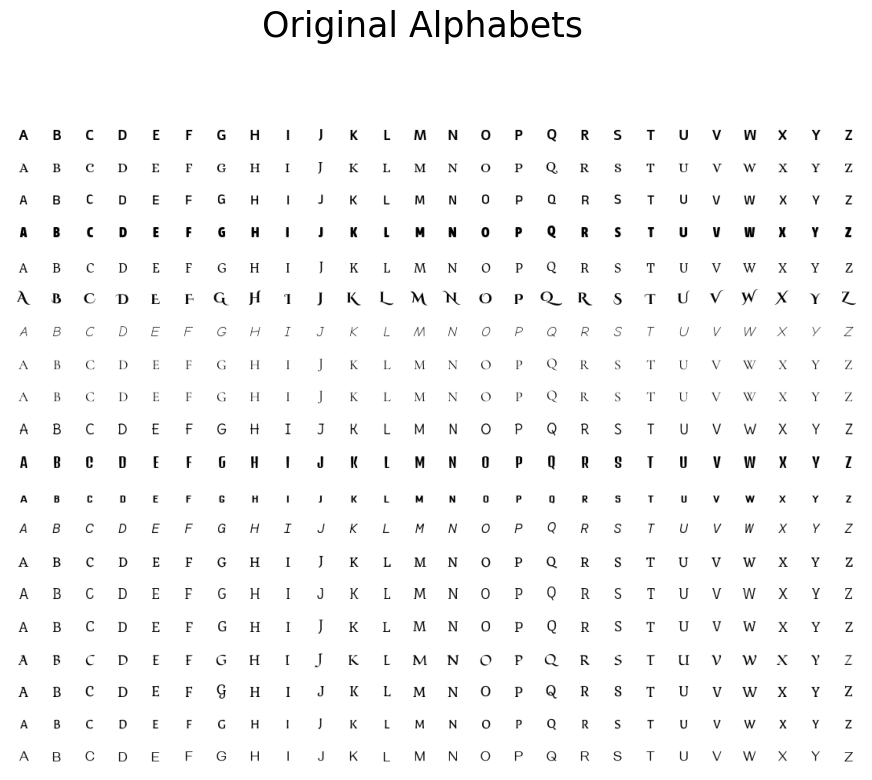

In [44]:
def show_data(train_images, title=""):
    plt.figure(figsize=(11,11))
    
    i = 1
    for img in train_images:
        plt.subplot(26, 26, i)
        plt.imshow(img.reshape((36, 36, 3)))
        plt.axis('off')
        i+=1
        if i>520: break

    plt.suptitle(title, fontsize = 25)
    plt.show()
    
show_data(train_images, title="Original Alphabets")

In [45]:
gen_optimizer = tf.keras.optimizers.Adam(0.0001, 0.5)
disc_optimizer = tf.keras.optimizers.Adam(0.0002, 0.5)
noise_dim = 100

In [46]:
def make_generator_model():
    model = Sequential()

    model.add(Dense(1024, input_dim=noise_dim))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    
    model.add(Dense(9*9*128, input_dim=noise_dim))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    
    model.add(Reshape((9, 9, 128)))

    model.add(Conv2DTranspose(64, (4, 4), padding='same', strides=(2, 2), kernel_initializer=RandomNormal(0, 0.02)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU())
    
    model.add(Conv2DTranspose(3, (4, 4), padding='same', activation = "tanh", strides=(2, 2),kernel_initializer=RandomNormal(0, 0.02)))

    return model

In [47]:
def make_discriminator_model():
    model = Sequential()
    
    model.add(Conv2D(64, (5, 5), strides=2, padding='same', kernel_initializer=RandomNormal(0, 0.02), input_shape=(36, 36, 3)))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128, (5, 5), strides=2, kernel_initializer=RandomNormal(0, 0.02)))
    model.add(LeakyReLU(0.2))
    
    model.add(Flatten())
    
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=disc_optimizer)
    return model

In [48]:
generator = make_generator_model()

In [49]:
discriminator = make_discriminator_model()

In [50]:
noise = Input(shape=(noise_dim,))
fake_data = generator(noise)
discriminator.trainable = False
output = discriminator(fake_data)
gan = tf.keras.models.Model(noise, output)
gan.compile(loss='binary_crossentropy', optimizer=gen_optimizer)

In [51]:
fixed_noise = np.random.normal(0, 1, size=(100, noise_dim))

In [52]:
def show_generated_alphabets(title, epoch):
    imgs = generator.predict(fixed_noise)
    imgs = 0.5 * imgs + 0.5        #Rescaling the normalized images b/w [0,1].
    plt.figure(figsize=(11,11))
    
    i = 1
    for img in imgs:
        plt.subplot(26, 26, i)
        plt.imshow(img.reshape((36, 36, 3)))
        plt.axis('off')
        i+=1
        if i>(26*3): break
    plt.suptitle(title, fontsize = 25)
    plt.savefig(str(epoch)+".png", transparent=True)
    plt.show()

In [53]:
epochs = 501
batch_size = 128
steps_per_epoch = len(train_images)//batch_size

4/4 [==============================] - 0s 10ms/step
epoch:  0
discriminator loss:  0.515917956829071
generator loss:  0.5945770144462585
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 9ms/step


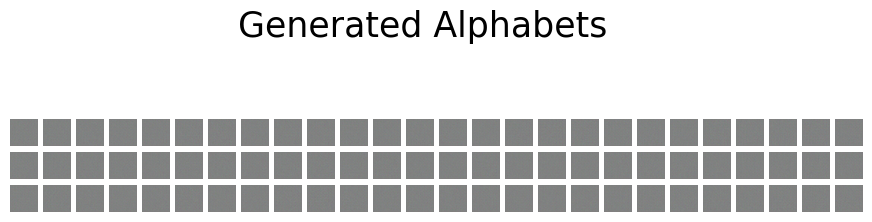

4/4 [==============================] - 0s 10ms/step
epoch:  1
discriminator loss:  0.5067653656005859
generator loss:  0.7485013008117676
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 11ms/step
epoch:  2
discriminator loss:  0.45538997650146484
generator loss:  1.2704282999038696
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 27ms/step
epoch:  3
discriminator loss:  0.4908024072647095
generator loss:  1.3099617958068848
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 12ms/step
epoch:  4
discriminator loss:  0.366377592086792
generator loss:  2.1016194820404053
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 12ms/step
epoch:  5
discriminator loss:  0.3324798047542572
generator loss:  2.829

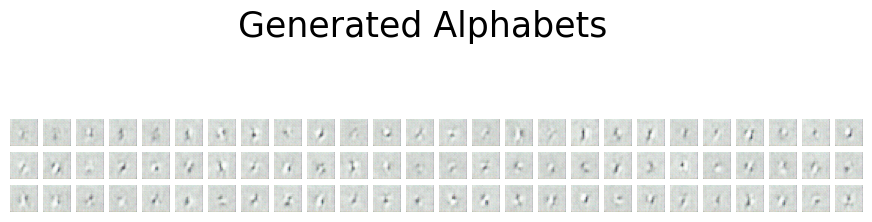

4/4 [==============================] - 0s 15ms/step
epoch:  51
discriminator loss:  0.5059747695922852
generator loss:  1.371226191520691
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 16ms/step
epoch:  52
discriminator loss:  0.3924062252044678
generator loss:  1.9226405620574951
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  53
discriminator loss:  0.39441943168640137
generator loss:  1.4083261489868164
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  54
discriminator loss:  0.44907355308532715
generator loss:  2.493358612060547
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  55
discriminator loss:  0.4307546019554138
generator loss:  

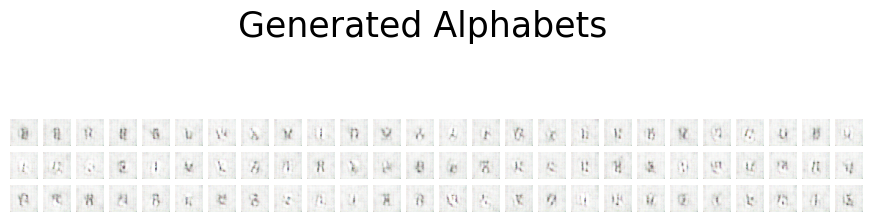

4/4 [==============================] - 0s 14ms/step
epoch:  101
discriminator loss:  0.49781614542007446
generator loss:  0.6159989237785339
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  102
discriminator loss:  0.4983264207839966
generator loss:  1.0246062278747559
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  103
discriminator loss:  0.5754532814025879
generator loss:  0.5236753225326538
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  104
discriminator loss:  0.4915023446083069
generator loss:  1.066946268081665
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  105
discriminator loss:  0.5151099562644958
generator lo

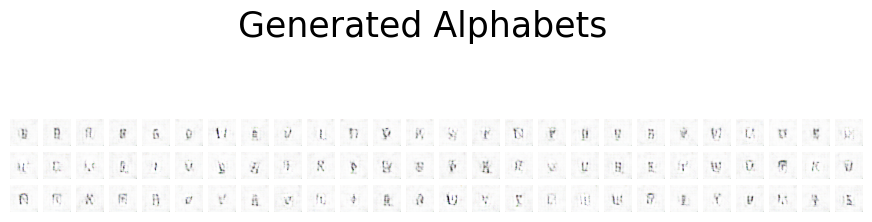

4/4 [==============================] - 0s 16ms/step
epoch:  151
discriminator loss:  0.5925517082214355
generator loss:  1.4117032289505005
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 15ms/step
epoch:  152
discriminator loss:  0.5761176347732544
generator loss:  0.8223901391029358
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 12ms/step
epoch:  153
discriminator loss:  0.5436118841171265
generator loss:  0.8694964647293091
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 14ms/step
epoch:  154
discriminator loss:  0.7161386013031006
generator loss:  0.37832826375961304
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  155
discriminator loss:  0.6762833595275879
generator l

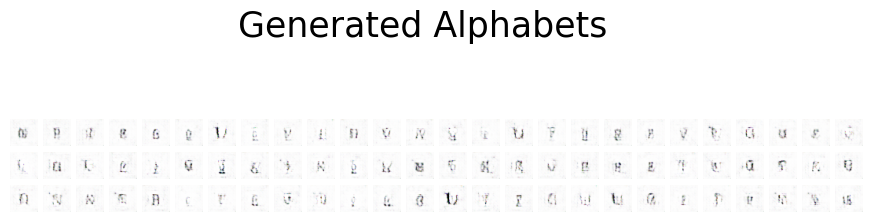

4/4 [==============================] - 0s 20ms/step
epoch:  201
discriminator loss:  0.597281813621521
generator loss:  0.9338551163673401
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 15ms/step
epoch:  202
discriminator loss:  0.564761757850647
generator loss:  0.9948321580886841
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  203
discriminator loss:  0.7233799695968628
generator loss:  1.9747138023376465
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  204
discriminator loss:  0.5981172919273376
generator loss:  0.6775743961334229
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 12ms/step
epoch:  205
discriminator loss:  0.5923736095428467
generator loss

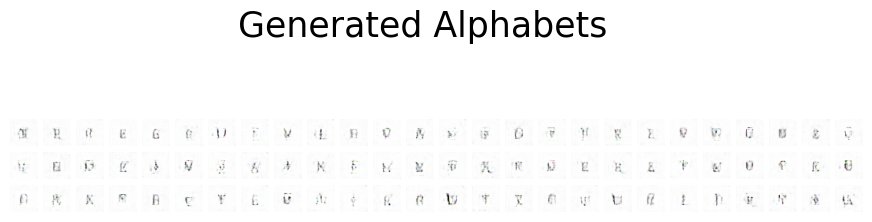

4/4 [==============================] - 0s 14ms/step
epoch:  251
discriminator loss:  0.5787615776062012
generator loss:  1.578329086303711
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 15ms/step
epoch:  252
discriminator loss:  0.5490791201591492
generator loss:  0.7535005807876587
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 15ms/step
epoch:  253
discriminator loss:  0.5844213962554932
generator loss:  0.9224545359611511
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 15ms/step
epoch:  254
discriminator loss:  0.5816076397895813
generator loss:  0.7841969728469849
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  255
discriminator loss:  0.6465842723846436
generator los

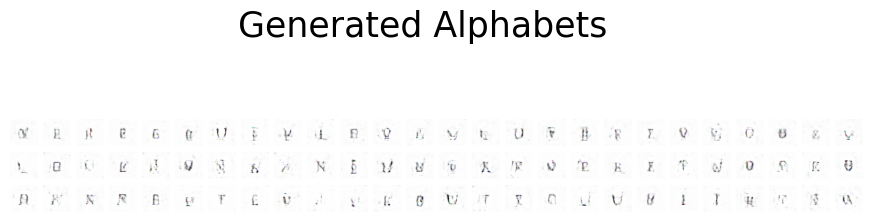

4/4 [==============================] - 0s 22ms/step
epoch:  301
discriminator loss:  0.5657330751419067
generator loss:  1.2964203357696533
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  302
discriminator loss:  0.7063313126564026
generator loss:  1.7608654499053955
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  303
discriminator loss:  0.529542088508606
generator loss:  0.9030992984771729
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  304
discriminator loss:  0.5274609327316284
generator loss:  1.2618968486785889
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  305
discriminator loss:  0.6149603128433228
generator los

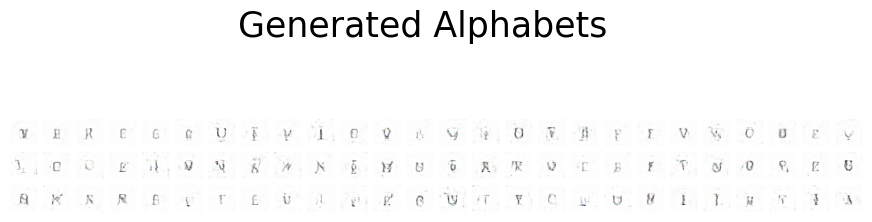

4/4 [==============================] - 0s 18ms/step
epoch:  351
discriminator loss:  0.5442941784858704
generator loss:  0.9652258157730103
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 14ms/step
epoch:  352
discriminator loss:  0.5055429339408875
generator loss:  1.3133341073989868
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  353
discriminator loss:  0.5963455438613892
generator loss:  1.7354822158813477
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  354
discriminator loss:  0.49680256843566895
generator loss:  1.161286473274231
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  355
discriminator loss:  0.5382539629936218
generator lo

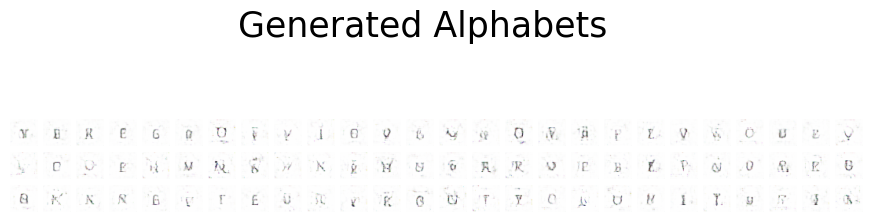

4/4 [==============================] - 0s 16ms/step
epoch:  401
discriminator loss:  0.4978262186050415
generator loss:  1.6639848947525024
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  402
discriminator loss:  0.49465084075927734
generator loss:  1.35325288772583
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 14ms/step
epoch:  403
discriminator loss:  0.5060413479804993
generator loss:  1.7295268774032593
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 11ms/step
epoch:  404
discriminator loss:  0.5489881038665771
generator loss:  1.9273581504821777
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 12ms/step
epoch:  405
discriminator loss:  0.5261063575744629
generator los

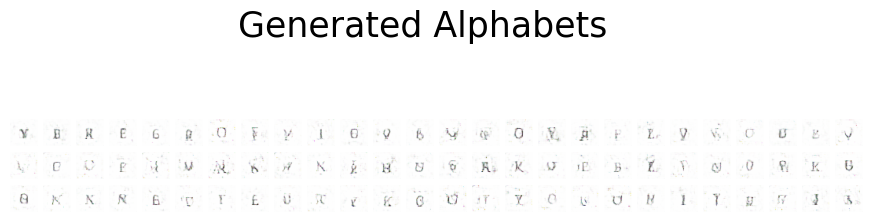

4/4 [==============================] - 0s 15ms/step
epoch:  451
discriminator loss:  0.4907190203666687
generator loss:  1.3393771648406982
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 14ms/step
epoch:  452
discriminator loss:  0.49963614344596863
generator loss:  0.6650618314743042
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 14ms/step
epoch:  453
discriminator loss:  0.5060879588127136
generator loss:  1.0497548580169678
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 13ms/step
epoch:  454
discriminator loss:  0.4923478066921234
generator loss:  0.8409643769264221
--------------------------------------------------------------------------------
4/4 [==============================] - 0s 14ms/step
epoch:  455
discriminator loss:  0.4487265944480896
generator l

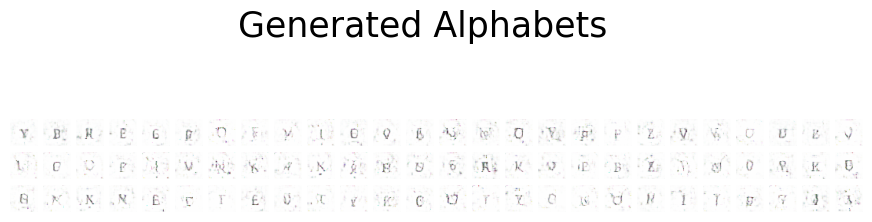

In [54]:
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        input_gen = np.random.normal(0, 1, size=(batch_size, noise_dim))
        fake_data = generator.predict(input_gen)
        
        real_data = train_images[np.random.randint(0, train_images.shape[0], size=batch_size)]
        real_data = real_data.reshape((batch_size, 36, 36, 3))
        
        input_disc = np.concatenate((real_data, fake_data))

        label_disc = np.zeros(2*batch_size)    # real+fake data.
        label_disc[:batch_size] = 0.9          # label of real images.
        label_disc[batch_size:] = 0.1          # label of fake images.
        loss_disc = discriminator.train_on_batch(input_disc, label_disc)

        label_gen = np.ones(batch_size)
        loss_gen = gan.train_on_batch(input_gen, label_gen)

    print("epoch: ", epoch)
    print("discriminator loss: ", loss_disc)
    print("generator loss: ", loss_gen)
    print("-"*80)
    
    if epoch % 50 == 0:
        show_generated_alphabets("Generated Alphabets", epoch)